<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_SVR_Bajas_MES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión con soporte máquina vectorial (SVR)
# objetivo: Predecir las bajas del mes

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/DBajas_PERIODO.txt',delimiter='~')
x = data1.iloc [:,:-1].values
y = data1.iloc [:,1].values

### Codificar datos categóricos

In [ ]:
'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder  = LabelEncoder()
x[:,0] = labelencoder.fit_transform(x[:,0])
x[:,1] = labelencoder.fit_transform(x[:,1])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0,1])],remainder='passthrough')
x= np.array(ct.fit_transform(x),dtype=np.integer)'''

### Evitar la trampa de variables Dummy

In [ ]:
'''x = x[:,1:]'''

In [ ]:
pd.DataFrame(x)

In [122]:
'''x_train=x
y_train=y

### Dividimos los datos en entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [ ]:
pd.DataFrame(x_train)

### Escalamos los datos

In [124]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train= sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
len(x_train[:,0])

### Ajustar las caracteristicas SVR

In [126]:
''' C: Evitar el overfity '''
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(x_train,y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
nuevo= np.array([202009,202010,202011,202012])
y_pred = sc_y.inverse_transform(regression.predict(sc_x.transform(nuevo.reshape(-1,1)) ))
pd.DataFrame(y_pred)

In [ ]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(regression.predict(x_train))

In [ ]:
pd.DataFrame(y_valor)

### Visualizar los resultados

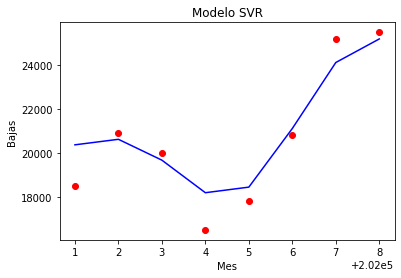

In [ ]:
x_grid= np.arange(min(x_valor),max(x_valor),0.01)
x_grid= x_grid.reshape(len(x_grid),1)
plt.scatter(x_valor,y_valor,color="Red")
plt.plot(x_valor,y_predic_valor,color="blue")
plt.title("Modelo SVR")
plt.xlabel("Mes")
plt.ylabel("Bajas")
plt.show()

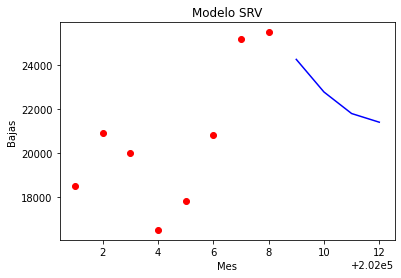

In [142]:
x_grid=np.arange(min(x_valor),max(x_valor),0.01)
x_grid= x_grid.reshape(len(x_grid),1)
plt.scatter(x_valor,y_valor,color="Red")
plt.plot(nuevo,y_pred,color="blue")
plt.title("Modelo SRV")
plt.xlabel("Mes")
plt.ylabel("Bajas")
plt.show()